# Introduccion

En este proyecto se llevará a cabo el análisis de las series de tiempo de dos marcas de gran relevancia en el sector económico: Netflix y Amazon. La hipótesis central que guía esta investigación es que ambas marcas están relacionadas entre sí, y el comportamiento de sus respectivas series de tiempo podría revelar patrones interdependientes. Este análisis buscará explorar cómo las fluctuaciones en las ventas, precios o variables asociadas a una marca pueden influir o correlacionarse con las de la otra, proporcionando así una comprensión más profunda de las dinámicas del mercado y el comportamiento de los consumidores.

El enfoque se centrará en la aplicación de técnicas avanzadas para el análisis de series de tiempo, comenzando con una evaluación independiente de cada serie. Posteriormente, se utilizará el concepto de causalidad de Granger para investigar posibles relaciones de causa y efecto entre las series de tiempo de ambas marcas. Además, se aplicará el modelo Prophet para realizar predicciones y pronósticos, evaluando sus alcances y limitaciones en este contexto específico.

A lo largo del proyecto, se estructurará un análisis detallado que incluya tanto los aspectos técnicos como los resultados obtenidos, y finalmente, se proporcionarán conclusiones basadas en los hallazgos clave de todo el proceso. Además, se garantizará la transparencia y accesibilidad del trabajo mediante la creación de un repositorio en GitHub, donde se subirá todo el código y los resultados obtenidos en el análisis.

# a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.

# Hipotesis

"Los precios de las acciones de Netflix (X) y Amazon (Y) están relacionados entre sí debido a factores económicos comunes, como la evolución del mercado tecnológico y cambios en la demanda de servicios digitales. Específicamente, un cambio en los precios de una podría influir o predecir cambios en la otra."

In [ ]:
import pandas as pd #Para manejar datos tabulares como los de un DataFrame.
import matplotlib.pyplot as plt #Para crear visualizaciones gráficas.
import yfinance as yf #Para descargar datos financieros como precios históricos de acciones.
import warnings #Se usa para ignorar advertencias que podrían generar distracciones.
warnings.filterwarnings('ignore')

df = yf.download( #se descargan los datos históricos de la acción
    tickers=['NFLX','AMZN'],
    start='2020-01-01',
    end='2023-01-01',
    interval='1d',
    group_by=None,
    auto_adjust=False,
    actions=False,
    )
df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  2 of 2 completed


,NFLX_Open,NFLX_High,NFLX_Low,NFLX_Close,NFLX_Adj Close,NFLX_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,281.920013,285.190002,273.410004,276.880005,276.880005,5964400,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


# b) Realiza un análisis de cada serie de tiempo de manera independiente (análisis basado en el examen de práctica).

# Serie de tiempo de Netflix



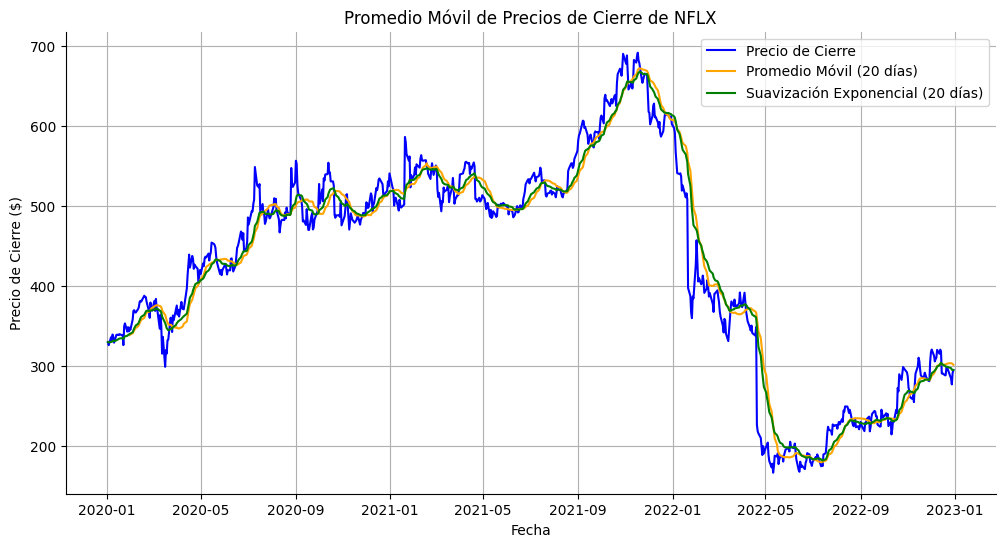

In [ ]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['NFLX_Close'].rolling(window=ventana_sma).mean() #Aquí se calcula el promedio móvil simple (SMA) para el precio de cierre de NFLX.
#Este promedio se calcula usando una ventana de 20 días (definido por la variable ventana_sma).

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['NFLX_Close'].ewm(span=ventana_ses, adjust=False).mean() #En este caso, se utiliza un promedio móvil exponencial (SES),
#que también suaviza los datos, pero da más peso a los valores más recientes. En este caso, también se está utilizando una ventana de
#20 días (ventana_ses).

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['NFLX_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de NFLX')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Rregresión polinomial

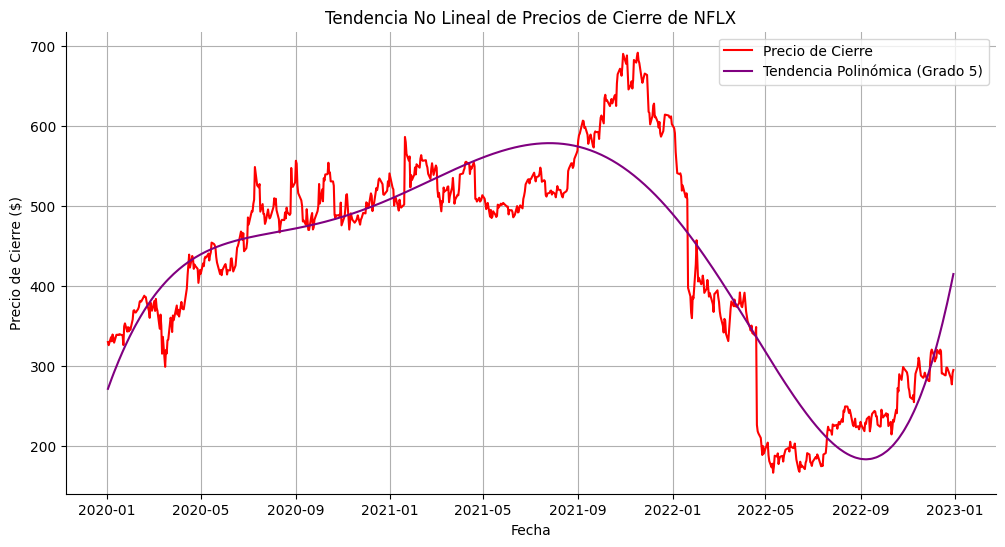

In [ ]:
from numpy.polynomial.polynomial import Polynomial
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp) #Se convierte la columna de fechas en un formato numérico (timestamp)
#para que se pueda utilizar como variable independiente en el modelo polinómico. Esto es necesario porque los modelos matemáticos
#como los polinómicos requieren variables numéricas.
X = df['Date']
y = df['NFLX_Close']
grado = 5
modelo = Polynomial.fit(X, y, deg = grado) #Se ajusta un modelo polinómico a los datos de precios de cierre de NFLX utilizando una
#regresión polinómica de grado 5 (definido por grado).
df['Poly_Trend'] = modelo(X) #Aquí se calcula la predicción de la tendencia basada en el modelo polinómico para cada valor de X (fecha).
df['Poly_Resid'] = y - df['Poly_Trend'] #Se calculan los residuos, que son las diferencias entre los precios reales de cierre y
#los valores ajustados por el modelo de tendencia. Estos residuos indican cuánto se desvían los datos reales de la tendencia estimada.
plt.figure(
    figsize=(12, 6)
    )

plt.plot(
    y,
    label='Precio de Cierre',
    color='red'
    )
plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de NFLX')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Gráfica los residuales del polinomio

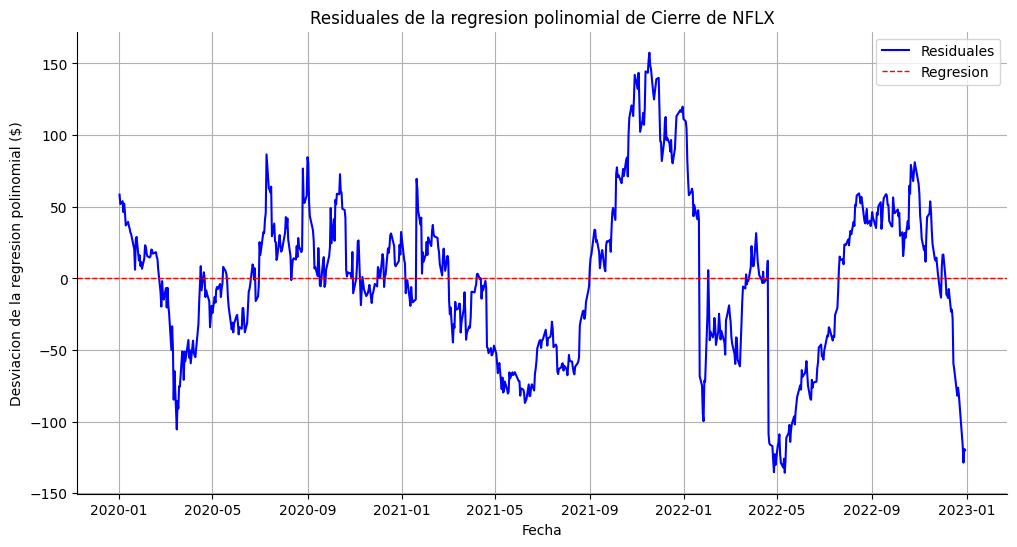

In [ ]:
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue') #Este código grafica los residuos, es decir, las diferencias entre los valores
#reales de cierre y las predicciones realizadas por el modelo polinómico. Los residuos muestran qué tan bien el modelo se ajusta a los datos;
#si son pequeños, el modelo es un buen ajuste, pero si son grandes, el modelo puede no ser adecuado.
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Se dibuja una línea horizontal en el valor 0
#(la línea roja discontinua). Esta línea sirve como referencia para visualizar cómo se distribuyen los residuos alrededor de cero.
#Idealmente, los residuos deben centrarse alrededor de cero si el modelo tiene un buen ajuste.
plt.title('Residuales de la regresion polinomial de Cierre de NFLX')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Transformada de Fourier

A continuación utilizaremos las series de Fourier, están se usan en el análisis de series de tiempo para descomponer y capturar patrones periódicos o estacionalidades en los datos.

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico): #realiza un análisis de Fourier sobre una serie de datos.
#La transformada de Fourier descompone una serie de datos en componentes sinusoidales (frecuencias) que pueden usarse para identificar patrones
#periódicos o cíclicos en la serie.
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie) #Es la serie temporal de datos a analizar (como precios de acciones, datos de sensores, etc.),
  #que debe ser un array de numpy o una serie de pandas.

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia      magnitud  longitud_de_onda
0    0.003968  19478.383356             252.0
1    0.005291  13242.646487             189.0
2    0.002646   6375.176564             378.0
3    0.009259   5408.086197             108.0
4    0.010582   4786.276850              94.5


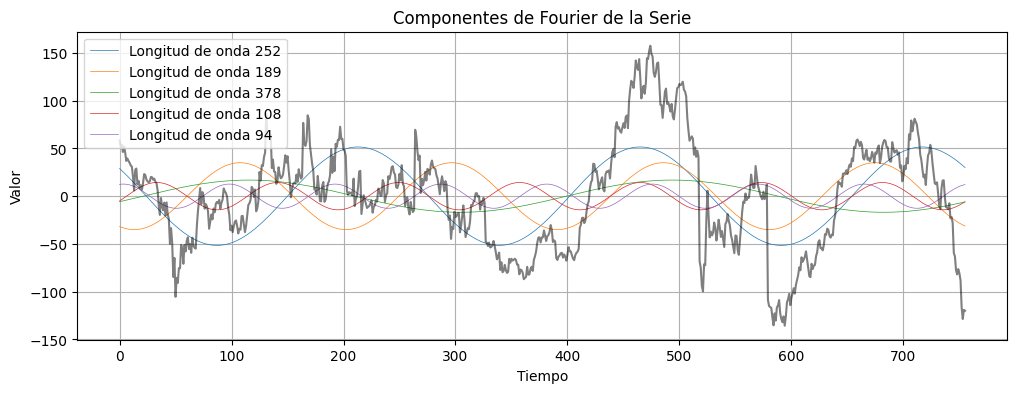

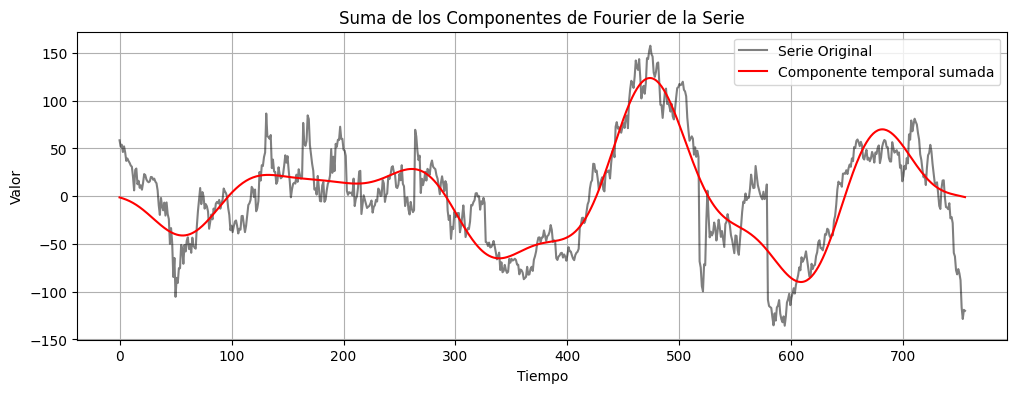

In [ ]:
serie = df['Poly_Resid'].values #quí, estás pasando los residuos del modelo polinómico (calculados previamente)
#como la serie temporal a la función Transformada_de_Fourier. Esta serie contiene las desviaciones entre los precios reales y
#la tendencia ajustada, por lo que puede contener información útil sobre las fluctuaciones o patrones no capturados por el modelo polinómico.
terminos = 5 #Estás especificando que quieres extraer las 5 frecuencias principales que mejor representen las fluctuaciones de los residuos.
#Cuanto más alto sea el número de términos, más detalles tendrá la reconstrucción de la serie, pero con 5 términos,
#obtendrás una aproximación simplificada.
un_grafico = False #Esto significa que la función generará gráficos separados, uno para cada componente de frecuencia,
#y un gráfico final para la suma de todos los componentes junto con la serie original.

cts = Transformada_de_Fourier(serie, terminos, un_grafico) #Aquí, se está ejecutando la función de la transformada de Fourier en los residuos y
#se guarda el resultado en la variable cts. El valor de cts es una lista que contiene los componentes temporales individuales
#que reconstruyen la serie de residuos utilizando las 5 frecuencias dominantes seleccionadas.

# cts: componente temporal sumado

# Descompón la serie de tiempo en sus componentes

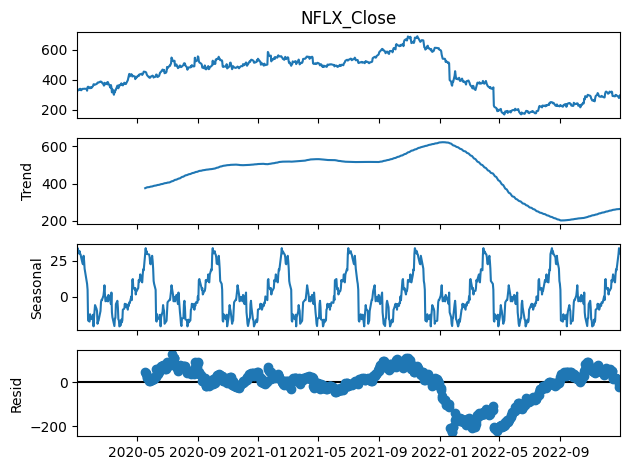

In [ ]:
import statsmodels.api as sm #descomponer una serie temporal en sus componentes fundamentales: tendencia, estacionalidad y residuo (ruido).

descomposicion = sm.tsa.seasonal_decompose(
    df['NFLX_Close'], #La serie temporal de precios de cierre de NFLX que se va a descomponer.
    model='additive', #ste modelo asume que los componentes de la serie se suman
    period=94, #Este parámetro define el período de la estacionalidad, en este caso, se asume que la serie tiene un ciclo estacional de 94 días.
    extrapolate_trend=0, # No se permite la extrapolación de la tendencia más allá del rango de la serie.
    #Los valores de la tendencia al final de la serie no se extienden más allá del último dato.
    two_sided=False, #Este parámetro indica que solo se usa una ventana de observación hacia el futuro
    #(en lugar de una ventana simétrica) para la descomposición.
    )
fig = descomposicion.plot() #El resultado de la descomposición se grafica automáticamente.
#El gráfico muestra los tres componentes: la tendencia, la estacionalidad y el residuo.
plt.show() # Muestra el gráfico generado.

# Prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna()) #Aquí se realiza la prueba ADF sobre los residuos (resid) de la descomposición estacional.
#Se utiliza dropna() para eliminar valores nulos de los residuos antes de realizar la prueba.

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -1.9977373445357072
P-valor: 0.2875660751644308
La tendencia no es estacionaria (aceptamos la hipotesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend #Obtiene el componente de la tendencia.
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend #Obtiene la combinación de tendencia y estacionalidad.

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad) #Se realiza una prueba t pareada para comparar las dos series.
#La prueba t pareada se usa para comparar dos muestras relacionadas (en este caso, las dos series de tiempo) y determinar si hay una diferencia significativa entre ellas.

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: -0.3330305920826392
Valor p: 0.7392167918084525


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


# Gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

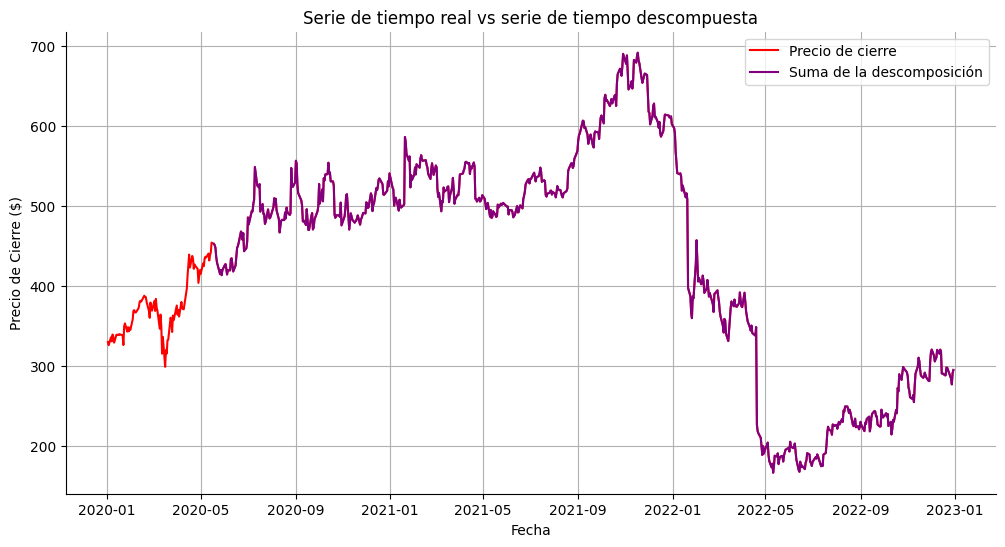

In [ ]:
# Grafico 1
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NFLX_Close'], label='Precio de cierre', color='red') #Esta línea grafica los precios de cierre originales de NFLX en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple') #Esta línea
#grafica la serie reconstruida sumando los componentes obtenidos de la descomposición aditiva:
#descomposicion.trend: Componente de tendencia.
#descomposicion.seasonal: Componente de estacionalidad.
#descomposicion.resid: Componente residual (errores).
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

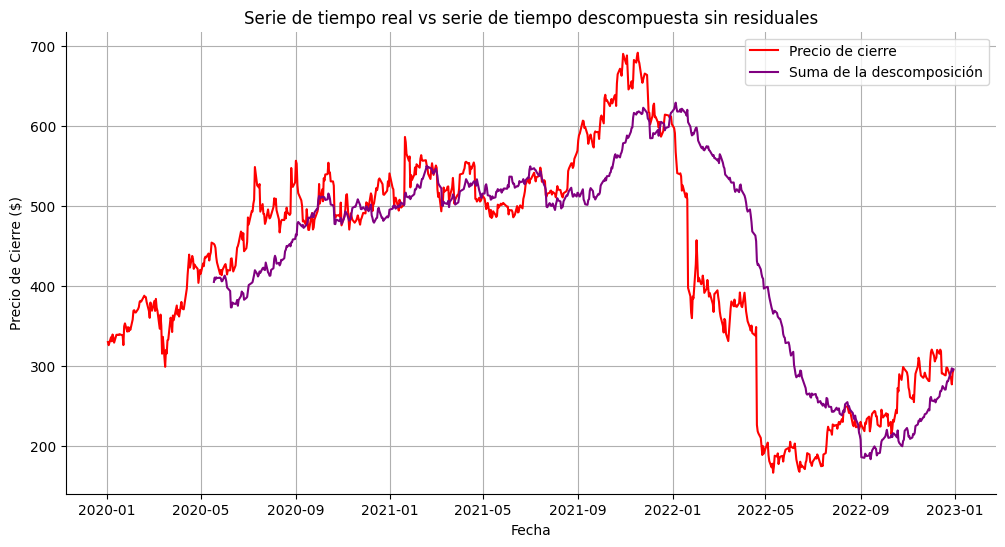

In [ ]:
# Grafico 2
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NFLX_Close'], label='Precio de cierre', color='red') #Esta línea grafica los precios de cierre originales de NFLX en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple') #Aquí, se grafica la serie
#reconstruida usando solo los componentes de tendencia (descomposicion.trend) y estacionalidad (descomposicion.seasonal),
#sin incluir los residuales. Esta serie es representada en color morado.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda que describe las dos series gráficas.
plt.grid() # Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

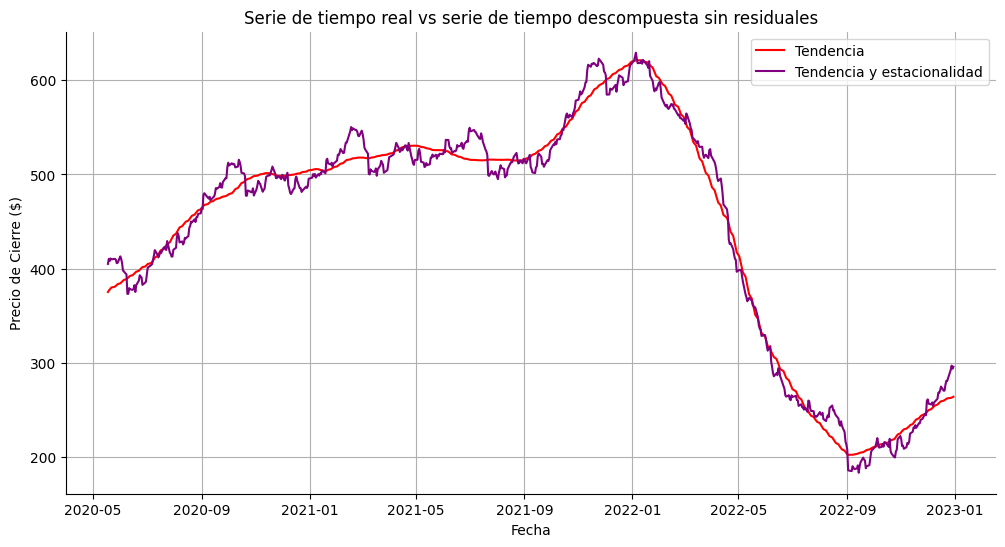

In [ ]:
# Grafico 3
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='red') #Grafica el componente de tendencia de la serie de precios en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple') #Grafica la tendencia y
#estacionalidad juntas, sumando ambos componentes, en color morado. Esto representa la evolución de la serie sin los residuales.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda que describe las dos series gráficas.
plt.grid() # Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

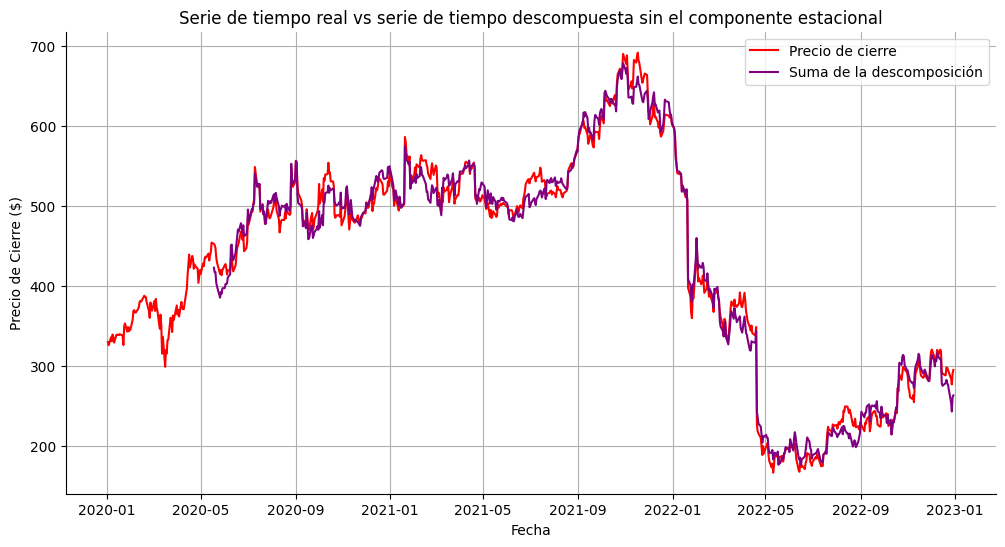

In [ ]:
# Grafico 4
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NFLX_Close'], label='Precio de cierre', color='red') #Grafica los precios de cierre originales de NFLX en color rojo.
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple') #Grafica la suma de la tendencia
#y los residuales, eliminando el componente estacional, en color morado. Esto representa la serie ajustada sin los patrones estacionales.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda para describir las series gráficas.
plt.grid() #Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

**Marco Teórico**


Promedio móvil
El promedio móvil es una herramienta estadística y matemática utilizada para analizar datos, especialmente en series temporales. Se calcula promediando un conjunto de valores dentro de un período específico que se va "moviendo" a lo largo de la serie de datos. Esto permite suavizar las fluctuaciones de corto plazo y resaltar tendencias más amplias.
En esta investigación se utilizó un promedio móvil con una ventana de 20 días, para así analizar el promedio ponderado en ese lapso de tiempo de los precios.

Suavización exponencial
La suavización exponencial es una técnica estadística utilizada para analizar y predecir datos en series temporales. Es similar al promedio móvil, pero en lugar de dar el mismo peso a todos los valores en el periodo, asigna mayor importancia a los datos más recientes mediante un factor de ponderación exponencial.
Fue útil para la investigación tomando una ventana de 40 días con esto se puede dar la importancia a los precios más recientes que a los antiguos.

Tendencia polinómica
La tendencia polinómica es un método estadístico utilizado para modelar y analizar series temporales o conjuntos de datos que no siguen una relación lineal simple. Este enfoque utiliza una función polinómica para describir la tendencia subyacente, ajustándose a datos que muestran patrones curvados o fluctuaciones más complejas.
La serie del tiempo tiene conjuntos de datos complicados es por ello que se utilizo un grado 5.

Series de Fourier
Las series de Fourier son una herramienta matemática utilizada para descomponer funciones periódicas complejas en una suma infinita de senos y cosenos, que son funciones periódicas simples. Este método es ampliamente utilizado en análisis de señales, física, procesamiento de datos y otras áreas donde se trabaja con fenómenos periódicos.
En el trabajo se aplicó para ver cada cuando se repite una estacionalidad en las series de tiempo de Netflix y Amazon.


Prueba ADF
La prueba de Dickey-Fuller Aumentada (ADF, por sus siglas en inglés) es una prueba estadística utilizada para verificar si una serie temporal es estacionaria o contiene una raíz unitaria (es decir, si tiene una tendencia no estacionaria). Es una herramienta clave en econometría y análisis de series temporales.
Se utilizó para comprobar que los residuales fueran estacionarios siendo un factor importante ya que muestra que el modelo se adapta a la serie de tiempo.

Prueba T
La prueba t es una prueba estadística utilizada para comparar las medias de una o dos muestras y determinar si las diferencias observadas son estadísticamente significativas. Es una herramienta fundamental en estadística inferencial para evaluar hipótesis.
En la investigación se utilizo para encontrar si las estacionalidad era significativa en la serie de tiempo.


**RESULTADOS:**

Con el análisis de esta serie, se obtuvieron los siguientes resultados:
La serie presenta fluctuaciones a mediados del año 2020 y 2021, los precios presentan un aumento constante en la segunda mitad del 2021, pero posteriormente se hay una caída significativa, y a inicios del 2022, los precios bajan de $700 hasta los 200, esto se puede deber a factores externos como la incertidumbre en el mercado o resultados financieros débiles. A finales del 2022 y principios del 2023 los precios de cierre empiezan a tener una cierta recuperación, esto es visible en el grafico al aplicar las ventanas móviles simple y exponencial.

Al aplicar La regresión polinomial ajustada a los datos del modelo con un grado 5. Se observa que desde el año 2020 hasta mediados del año 2021 hay un crecimiento sostenido en los precios. A mediados del 2021 se refleja el punto más alto, donde la tendencia alcanza un máximo, un precio estimado de $700, después inicia una fase de descenso en los precios en el año 2022. Donde a finales del 2022 e inicios del 2023 la tendencia empieza a tener un crecimiento al alza, lo que indica una recuperación. Así mismo, los residuales del modelo muestran a lo largo del gráfico, que la mayoría de los residuales se encuentran alrededor del 0, algo normal en una regresión, no obstante, hay periodos en los residuales muy significativos que pueden señalar eventos externos o momentos de alta volatilidad, lo que indica que el modelo no tiene un sesgo significativo en sus predicciones. En ciertos puntos los residuales son más grandes, como en las fases de crecimiento, por ejemplo, a finales del año 2021; así como también en las caídas rudas, como las observadas a mediados del año 2022.


Con el análisis de los componentes de la serie obtenidos tras descomponer la serie, se analizó lo siguiente:
- Grafico original: Muestra los precios de cierre de Netflix a lo largo del tiempo, se pueden observar una tendencia general al alza hasta mediada del año 2021, donde después tendrá una fuerte caída.

- Tendencia: Presenta ser ascendente hasta llegar aproximadamente a inicios del 2022, después presenta una caída, y nuevamente se intenta recuperar hacia finales del 2022, esto muestra cambios a largo plazo que tienen los precios de cierre.

- Estacionalidad: Se presentan picos y valles regulares, donde posiblemente se reflejen variaciones estacionales en el comportamiento de precios de Netflix, que pueden ser ciclos relacionados con el lanzamiento de nuevas series o películas.

- Residuales: En los residuales se observan algunas variaciones de un gran tamaño en ciertos periodos, lo que puede sugerir momentos de alta volatilidad.

El valor obtenido de la prueba ADF no es lo suficientemente bajo para que se rechace la hipótesis nula con un valor de -1.99, el p-valor de la prueba es de 0.2875 siendo mayor al valor común de 0.05, esto demuestra que no hay suficiente evidencia de rechazar la hipótesis nula.

Por último, los resultados obtenidos de la prueba ADF aplicada al modelo muestran que los residuales no son estacionarios, esto se puede atribuir a la existencia de patrones o componentes estructurales en los datos, como por ejemplo: ciclos, cambios bruscos u otras formas de dependencia temporal, que el modelo polinomico no logra capturar completamente, esto se atribute a que el valor de la prueba ADF no es lo suficientemente bajo para que se rechace la hipótesis nula con un valor de -1.99, el p-valor de la prueba es de 0.2875 siendo mayor al valor común de 0.05, esto demuestra que no hay suficiente evidencia de rechazar la hipótesis nula. Por otro lado, el valor estadístico de la prueba t pareada es de -0.3330, al ser un valor muy cercano a cero, indica que la diferencia entre los datos con y sin estacionalidad es muy pequeña. El valor p es mucho mayor que 0.05, siendo de 0.7392, esto significa que no podemos rechazar la hipótesis nula, la estacionalidad no tiene un efecto significativo en la serie, con base a los resultados obtenidos de la prueba t pareada; lo que compromete que no es necesario someter al modelo a términos estacionales.


# Serie de tiempo de Amazon

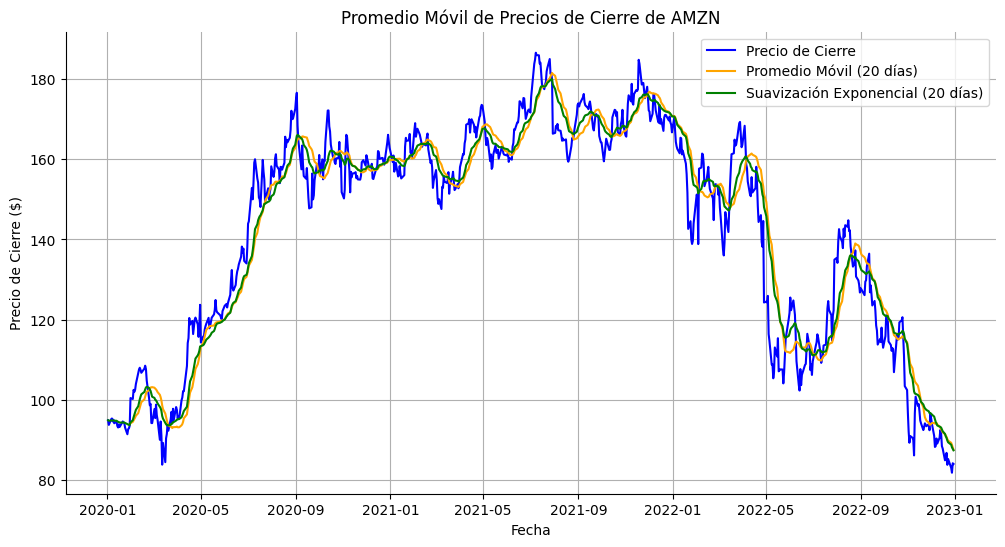

In [ ]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['AMZN_Close'].rolling(window=ventana_sma).mean() #Aquí se calcula el promedio móvil simple (SMA) para el precio de cierre de AMZN.
#Este promedio se calcula usando una ventana de 20 días (definido por la variable ventana_sma).

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['AMZN_Close'].ewm(span=ventana_ses, adjust=False).mean() #En este caso, se utiliza un promedio móvil exponencial (SES),
#que también suaviza los datos, pero da más peso a los valores más recientes. En este caso, también se está utilizando una ventana de
#20 días (ventana_ses).

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AMZN_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de AMZN')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Rregresión polinomial

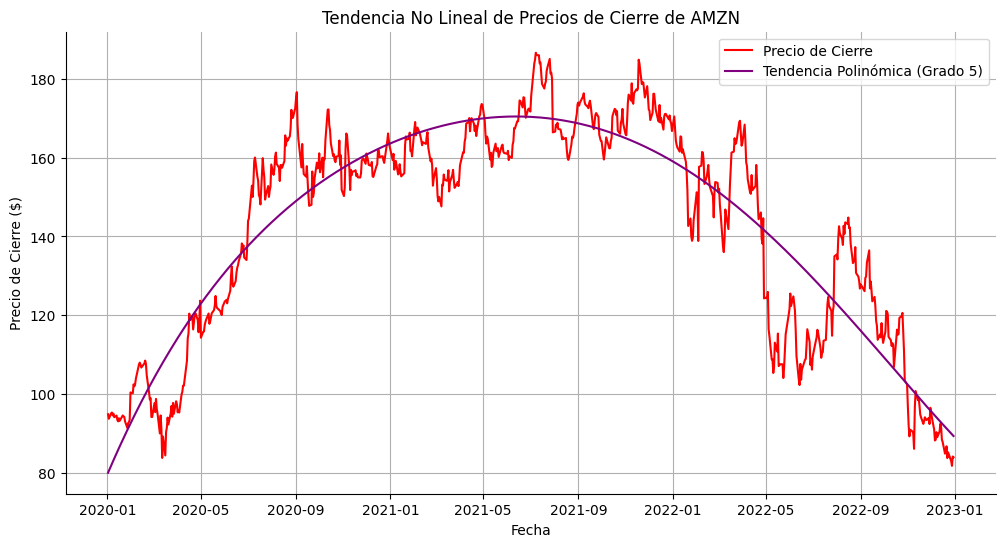

In [ ]:
from numpy.polynomial.polynomial import Polynomial
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp) #Se convierte la columna de fechas en un formato numérico (timestamp)
#para que se pueda utilizar como variable independiente en el modelo polinómico. Esto es necesario porque los modelos matemáticos
#como los polinómicos requieren variables numéricas.
X = df['Date']
y = df['AMZN_Close']
grado = 5
modelo = Polynomial.fit(X, y, deg = grado) #Se ajusta un modelo polinómico a los datos de precios de cierre de AMZN utilizando una
#regresión polinómica de grado 5 (definido por grado).
df['Poly_Trend'] = modelo(X) #Aquí se calcula la predicción de la tendencia basada en el modelo polinómico para cada valor de X (fecha).
df['Poly_Resid'] = y - df['Poly_Trend'] #Se calculan los residuos, que son las diferencias entre los precios reales de cierre y
#los valores ajustados por el modelo de tendencia. Estos residuos indican cuánto se desvían los datos reales de la tendencia estimada.
plt.figure(
    figsize=(12, 6)
    )

plt.plot(
    y,
    label='Precio de Cierre',
    color='red'
    )
plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de AMZN')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Gráfica los residuales del polinomio

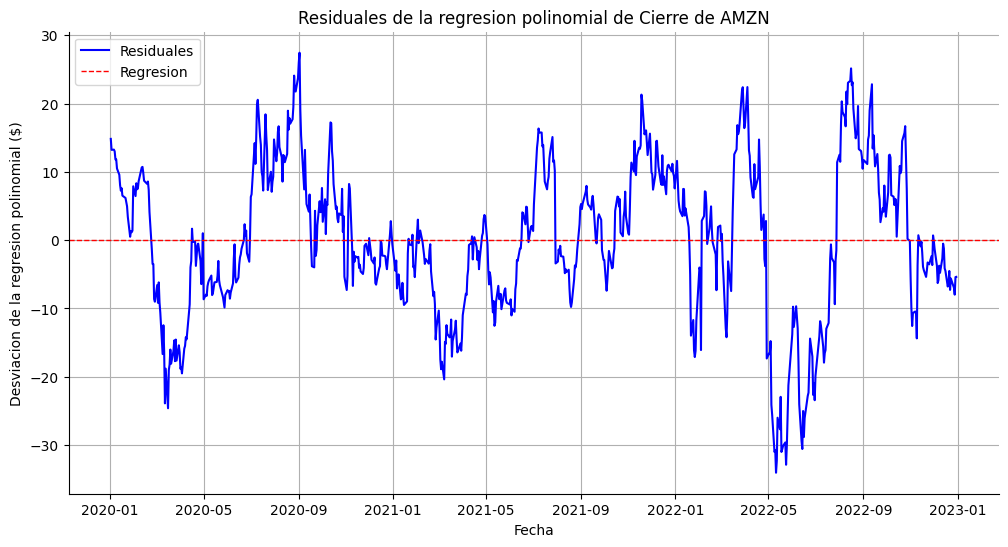

In [ ]:
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue') #Este código grafica los residuos, es decir, las diferencias entre los valores
#reales de cierre y las predicciones realizadas por el modelo polinómico. Los residuos muestran qué tan bien el modelo se ajusta a los datos;
#si son pequeños, el modelo es un buen ajuste, pero si son grandes, el modelo puede no ser adecuado.
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Se dibuja una línea horizontal en el valor 0
#(la línea roja discontinua). Esta línea sirve como referencia para visualizar cómo se distribuyen los residuos alrededor de cero.
#Idealmente, los residuos deben centrarse alrededor de cero si el modelo tiene un buen ajuste.
plt.title('Residuales de la regresion polinomial de Cierre de AMZN')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Transformada de Fourier

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico): #realiza un análisis de Fourier sobre una serie de datos.
#La transformada de Fourier descompone una serie de datos en componentes sinusoidales (frecuencias) que pueden usarse para identificar patrones
#periódicos o cíclicos en la serie.
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie) #Es la serie temporal de datos a analizar (como precios de acciones, datos de sensores, etc.),
  #que debe ser un array de numpy o una serie de pandas.

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.003968  2723.167565             252.0
1    0.009259  2066.844212             108.0
2    0.010582  1888.320779              94.5
3    0.005291  1840.144344             189.0
4    0.007937  1514.285177             126.0


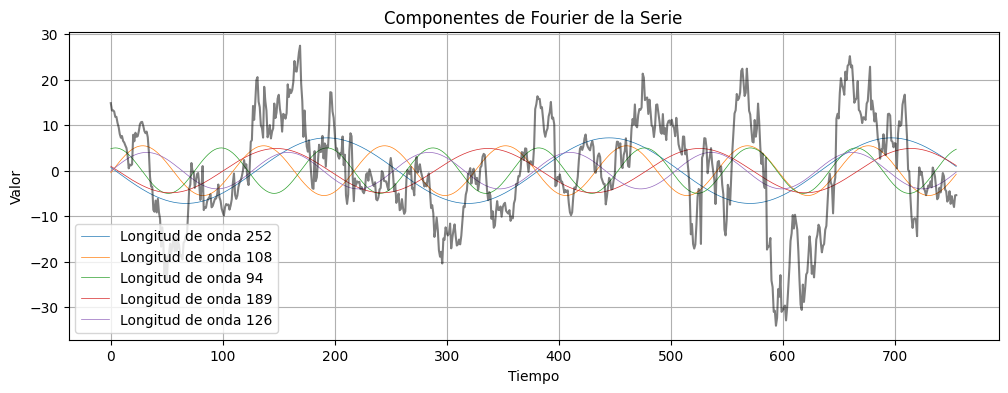

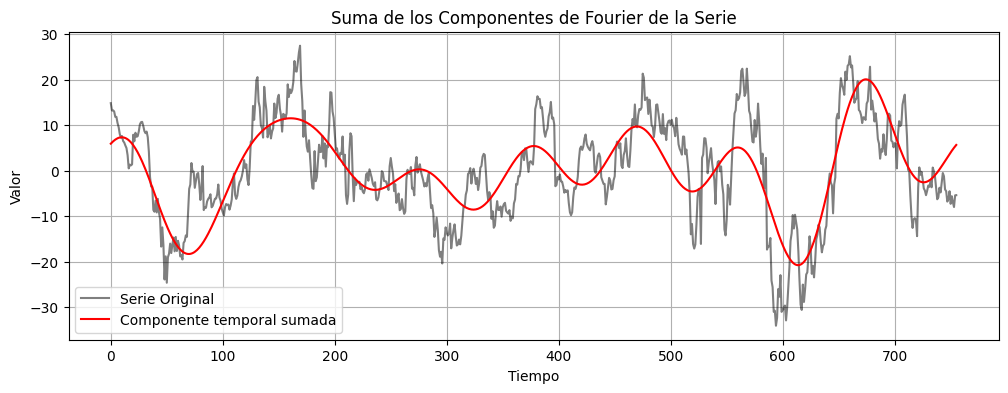

In [ ]:
serie = df['Poly_Resid'].values #quí, estás pasando los residuos del modelo polinómico (calculados previamente)
#como la serie temporal a la función Transformada_de_Fourier. Esta serie contiene las desviaciones entre los precios reales y
#la tendencia ajustada, por lo que puede contener información útil sobre las fluctuaciones o patrones no capturados por el modelo polinómico.
terminos = 5 #Estás especificando que quieres extraer las 5 frecuencias principales que mejor representen las fluctuaciones de los residuos.
#Cuanto más alto sea el número de términos, más detalles tendrá la reconstrucción de la serie, pero con 5 términos,
#obtendrás una aproximación simplificada.
un_grafico = False #Esto significa que la función generará gráficos separados, uno para cada componente de frecuencia,
#y un gráfico final para la suma de todos los componentes junto con la serie original.

cts = Transformada_de_Fourier(serie, terminos, un_grafico) #Aquí, se está ejecutando la función de la transformada de Fourier en los residuos y
#se guarda el resultado en la variable cts. El valor de cts es una lista que contiene los componentes temporales individuales
#que reconstruyen la serie de residuos utilizando las 5 frecuencias dominantes seleccionadas.

# cts: componente temporal sumado

# Descompón la serie de tiempo en sus componentes

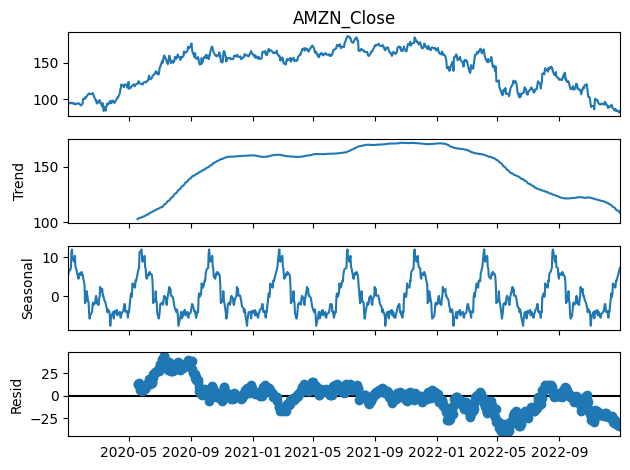

In [ ]:
import statsmodels.api as sm #descomponer una serie temporal en sus componentes fundamentales: tendencia, estacionalidad y residuo (ruido).

descomposicion = sm.tsa.seasonal_decompose(
    df['AMZN_Close'], #La serie temporal de precios de cierre de AMZN que se va a descomponer.
    model='additive', #ste modelo asume que los componentes de la serie se suman
    period=94, #Este parámetro define el período de la estacionalidad, en este caso, se asume que la serie tiene un ciclo estacional de 94 días.
    extrapolate_trend=0, # No se permite la extrapolación de la tendencia más allá del rango de la serie.
    #Los valores de la tendencia al final de la serie no se extienden más allá del último dato.
    two_sided=False, #Este parámetro indica que solo se usa una ventana de observación hacia el futuro
    #(en lugar de una ventana simétrica) para la descomposición.
    )
fig = descomposicion.plot() #El resultado de la descomposición se grafica automáticamente.
#El gráfico muestra los tres componentes: la tendencia, la estacionalidad y el residuo.
plt.show() # Muestra el gráfico generado.

# Prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna()) #Aquí se realiza la prueba ADF sobre los residuos (resid) de la descomposición estacional.
#Se utiliza dropna() para eliminar valores nulos de los residuos antes de realizar la prueba.

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -2.2198121393274737
P-valor: 0.19913352959289154
La tendencia no es estacionaria (aceptamos la hipotesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend #Obtiene el componente de la tendencia.
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend #Obtiene la combinación de tendencia y estacionalidad.

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad) #Se realiza una prueba t pareada para comparar las dos series.
#La prueba t pareada se usa para comparar dos muestras relacionadas (en este caso, las dos series de tiempo) y determinar si hay una diferencia significativa entre ellas.

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.21928289231339793
Valor p: 0.826497382029802


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


# Gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

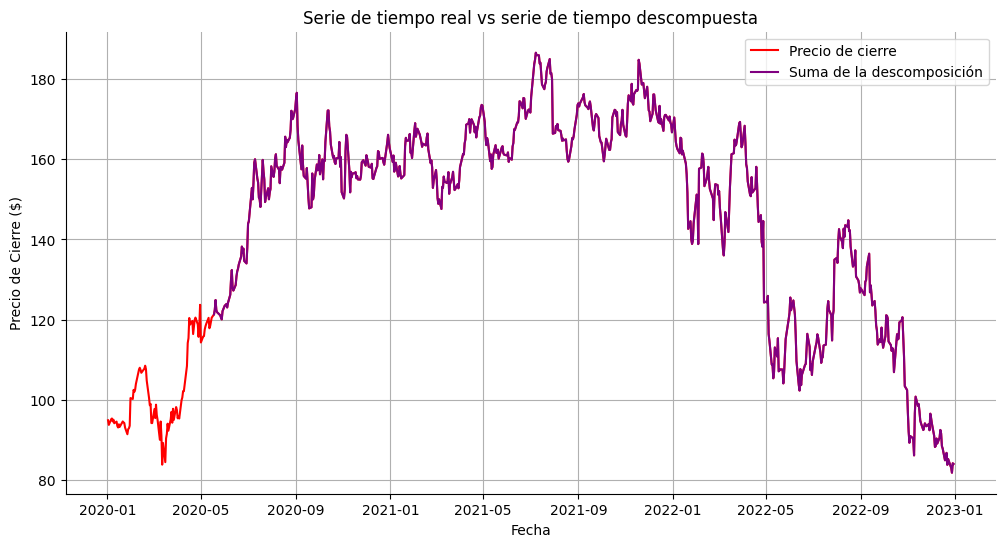

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['AMZN_Close'], label='Precio de cierre', color='red') #Esta línea grafica los precios de cierre originales de AMZN en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple') #Esta línea
#grafica la serie reconstruida sumando los componentes obtenidos de la descomposición aditiva:
#descomposicion.trend: Componente de tendencia.
#descomposicion.seasonal: Componente de estacionalidad.
#descomposicion.resid: Componente residual (errores).
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

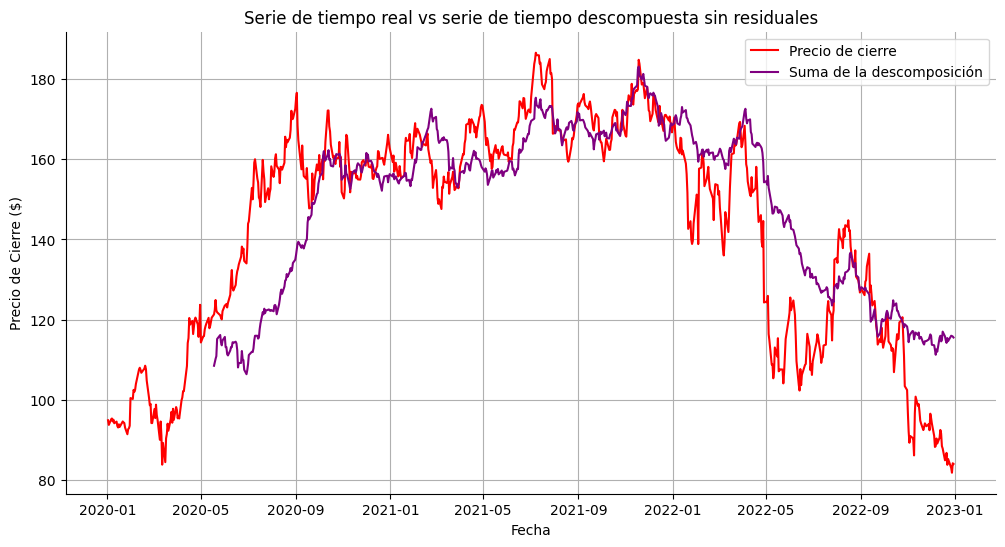

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['AMZN_Close'], label='Precio de cierre', color='red') #Esta línea grafica los precios de cierre originales de AMZN en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple') #Aquí, se grafica la serie
#reconstruida usando solo los componentes de tendencia (descomposicion.trend) y estacionalidad (descomposicion.seasonal),
#sin incluir los residuales. Esta serie es representada en color morado.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda que describe las dos series gráficas.
plt.grid() # Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

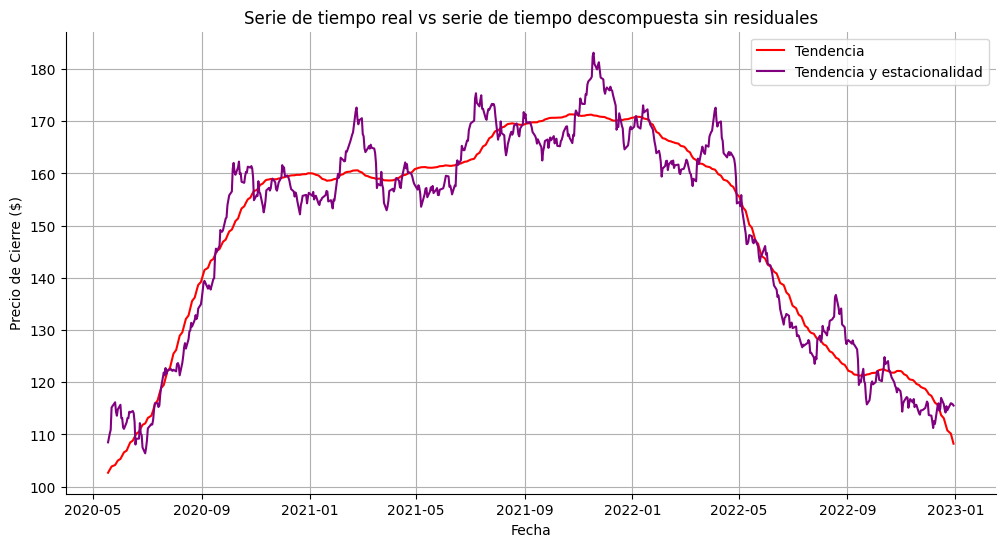

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='red') #Grafica el componente de tendencia de la serie de precios en color rojo.
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple') #Grafica la tendencia y
#estacionalidad juntas, sumando ambos componentes, en color morado. Esto representa la evolución de la serie sin los residuales.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda que describe las dos series gráficas.
plt.grid() # Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

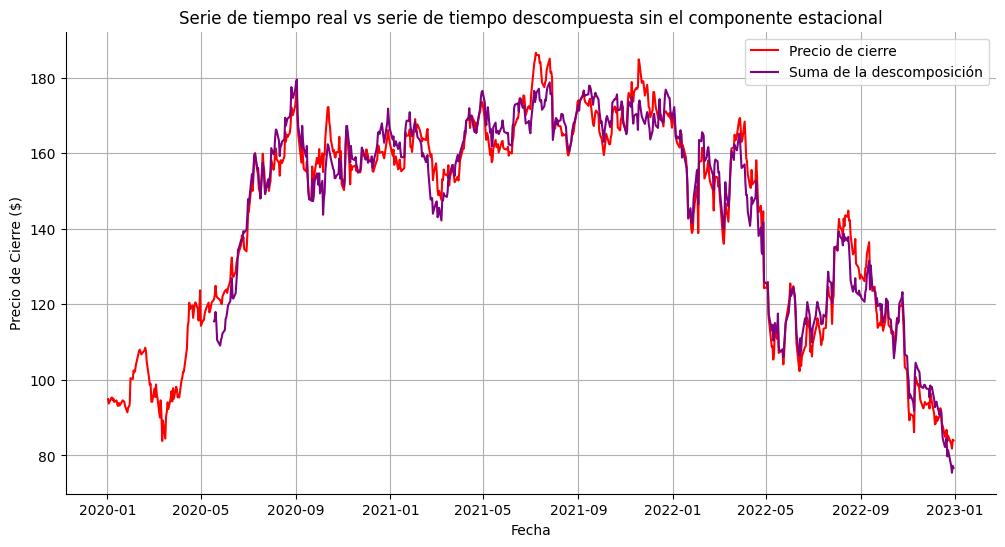

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['AMZN_Close'], label='Precio de cierre', color='red') #Grafica los precios de cierre originales de AMZN en color rojo.
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple') #Grafica la suma de la tendencia
#y los residuales, eliminando el componente estacional, en color morado. Esto representa la serie ajustada sin los patrones estacionales.
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional') #Título de la gráfica.
plt.xlabel('Fecha') #Etiqueta del eje x (fecha).
plt.ylabel('Precio de Cierre ($)') #Etiqueta del eje y (precio de cierre).
plt.legend() #Muestra la leyenda para describir las series gráficas.
plt.grid() #Activa la cuadrícula en la gráfica.
plt.gca().spines['top'].set_visible(False) #Elimina la línea superior de la gráfica.
plt.gca().spines['right'].set_visible(False) #Elimina la línea derecha de la gráfica.
plt.show() #Muestra la gráfica generada.

**Resultados**


Los resultados de la gráfica de tendencia de la serie de tiempo original muestran lo siguiente:


La gráfica de la tendencia de los precios de Amazon muestra que, desde principios de 2020 hasta mediados de 2021, los precios tuvieron un aumento constante. Esto probablemente se debió al auge de las compras en línea durante la pandemia, lo que benefició a empresas como Amazon. Sin embargo, desde finales de 2021 y durante todo 2022, los precios comenzaron a bajar de manera continua. Esta caída podría estar relacionada con problemas económicos, cambios en el mercado o una menor confianza en el crecimiento futuro de la empresa. Las líneas de tendencia más suaves, como el promedio móvil y la suavización exponencial, ayudan a ver mejor estos cambios al eliminar las variaciones diarias, marcando los momentos clave en los que las tendencias cambiaron.


El gráfico de regresión polinomial arroja los siguientes resultados:

La gráfica muestra cómo han cambiado los precios de las acciones de Amazon (AMZN) desde el año 2020 hasta finales de 2022. Al principio, los precios subieron bastante, especialmente durante 2020 y 2021, probablemente porque muchas personas compraban más en línea debido a la pandemia, lo que benefició a la empresa. Sin embargo, después de alcanzar su punto más alto a mediados de 2021, los precios empezaron a bajar de forma constante hasta finales de 2022.
La línea curva que aparece en la gráfica  ayuda a ver esta tendencia más clara, eliminando las subidas y bajadas diarias. Muestra que  Amazon tuvo un buen periodo al inicio, las cosas cambiaron y los precios comenzaron a caer. Esto podría deberse a problemas económicos generales, mayores costos o a que los inversionistas ya no estaban tan seguros del crecimiento futuro de la empresa. En resumen, la gráfica cuenta la historia de un gran crecimiento seguido por una caída sostenida, marcando un cambio en cómo el mercado ve a Amazon.

El gráfico de residuales dice lo siguiente:

La gráfica muestra los residuales de una regresión polinomial aplicada a los precios de cierre de Amazon (AMZN). Los residuales, en azul, varían alrededor de cero, lo que indica que el modelo representa bien la tendencia general. La línea roja muestra que, en promedio, no hay un desvío significativo, aunque hay momentos donde las diferencias son más marcadas. Esto sugiere que el modelo funciona bien.

La descomposición de los precios de cierre de Amazon (AMZN) en sus componentes principales muestra: tendencia, estacionalidad y residuales. El gráfico superior muestra los datos originales, seguidos por la tendencia que evidencia un crecimiento hasta mediados de 2021, seguido de una caída gradual. La estacionalidad refleja patrones repetitivos a lo largo del tiempo, mientras que los residuales, en el gráfico inferior, muestran las diferencias que no son explicadas por la tendencia ni la estacionalidad, oscilando alrededor de cero sin variaciones extremas significativas. Esto sugiere que el modelo captura bien los principales comportamientos del dato.

Los resultados de la prueba ADF de la descomposición sugieren lo siguiente:
El resultado mostró un valor p de 0.199, mayor al nivel de significancia de 0.05. Esto indica que los residuos no son completamente estables, lo que sugiere que podría haber partes de la tendencia aún no capturadas.

# c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo

**Concepto:**
La causalidad de Granger es un método estadístico utilizado para determinar si una serie de tiempo puede ser útil para predecir otra.
La causalidad de Granger se basa en la idea de que, si una variable Xt "causa" a en el sentido de Granger, entonces los valores pasados de Xt deben contener información que ayude a predecir Yt más allá de la que ya contienen los valores pasados de Yt

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['NFLX_Close', 'AMZN_Close']], max_lags,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7710  , p=0.1837  , df_denom=752, df_num=1
ssr based chi2 test:   chi2=1.7780  , p=0.1824  , df=1
likelihood ratio test: chi2=1.7760  , p=0.1826  , df=1
parameter F test:         F=1.7710  , p=0.1837  , df_denom=752, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0578  , p=0.3477  , df_denom=749, df_num=2
ssr based chi2 test:   chi2=2.1298  , p=0.3448  , df=2
likelihood ratio test: chi2=2.1268  , p=0.3453  , df=2
parameter F test:         F=1.0578  , p=0.3477  , df_denom=749, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2497  , p=0.2907  , df_denom=746, df_num=3
ssr based chi2 test:   chi2=3.7844  , p=0.2857  , df=3
likelihood ratio test: chi2=3.7749  , p=0.2868  , df=3
parameter F test:         F=1.2497  , p=0.2907  , df_denom=746, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9687  , p=0.4239  

En ninguno de los lags (1 a 5) se encuentra evidencia estadísticamente significativa (p<0.05) para rechazar la hipótesis nula (𝐻0). Esto significa que, según los resultados del análisis de causalidad de Granger:

Los valores pasados de NFLX_Close (Netflix) no tienen un efecto causal significativo sobre AMZN_Close (Amazon) en el rango de rezagos analizado.

Esto implica que las series de tiempo de Netflix no "causan" a las de Amazon en el sentido de Granger bajo este análisis.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['AMZN_Close', 'NFLX_Close']], max_lags,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6191  , p=0.0319  , df_denom=752, df_num=1
ssr based chi2 test:   chi2=4.6375  , p=0.0313  , df=1
likelihood ratio test: chi2=4.6234  , p=0.0315  , df=1
parameter F test:         F=4.6191  , p=0.0319  , df_denom=752, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5156  , p=0.0815  , df_denom=749, df_num=2
ssr based chi2 test:   chi2=5.0647  , p=0.0795  , df=2
likelihood ratio test: chi2=5.0478  , p=0.0801  , df=2
parameter F test:         F=2.5156  , p=0.0815  , df_denom=749, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6346  , p=0.1799  , df_denom=746, df_num=3
ssr based chi2 test:   chi2=4.9499  , p=0.1755  , df=3
likelihood ratio test: chi2=4.9337  , p=0.1767  , df=3
parameter F test:         F=1.6346  , p=0.1799  , df_denom=746, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4718  , p=0.2089  

**Lag 1**: Hay evidencia estadística significativa (p<0.05) de que los valores pasados de Netflix (NFLX_Close) causan a Amazon (AMZN_Close).

**Lags 2 a 5:** No se encuentra evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que, para más de un lag, no hay una relación causal significativa entre las dos series temporales en este análisis.

Esto indica que la influencia causal detectada entre Netflix y Amazon parece ser inmediata (lag 1), pero no persiste en rezagos mayores.

# d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

**Investigacion:** Prophet es una herramienta desarrollada por Facebook para modelar series de tiempo, diseñada para manejar tendencias y estacionalidades de manera sencilla y automatizada. Es especialmente útil en datos que presentan patrones complejos o que tienen componentes de estacionalidad diaria, semanal o anual. Prophet funciona bien con datos históricos irregulares y permite incorporar cambios de tendencia o eventos puntuales.

**Alcance:**

Simplicidad: Requiere poca configuración y es fácil de implementar.

Flexibilidad: Puede modelar tendencias lineales o no lineales, y permite ajustar la estacionalidad según el caso.

Manejo de datos faltantes: Prophet puede trabajar incluso si los datos tienen huecos.

Interactividad: Permite incorporar eventos especiales o días festivos manualmente.


**Limitaciones:**

No captura relaciones entre múltiples series: Prophet es un modelo univariado y no incluye interacciones entre variables.

No optimizado para alta frecuencia: Su desempeño se reduce con datos como transacciones minuto a minuto.

Simplificación excesiva: Aunque es flexible, su capacidad para ajustar patrones muy complejos puede ser limitada.

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers=['NFLX','AMZN'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  2 of 2 completed


,NFLX_Open,NFLX_High,NFLX_Low,NFLX_Close,NFLX_Adj Close,NFLX_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,263.829987,264.500000,241.289993,246.389999,246.389999,21397600,73.249496,74.000000,68.197998,68.872498,68.872498,272806000
2018-12-24,242.000000,250.649994,233.679993,233.880005,233.880005,9547600,67.300003,69.801498,65.349998,67.197998,67.197998,144400000
2018-12-26,233.919998,254.500000,231.229996,253.669998,253.669998,14402700,68.444504,73.657997,68.150497,73.544998,73.544998,208236000


In [ ]:
!pip install prophet

# Netflix

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/tqfjuutz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/56x7kh13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4464', 'data', 'file=/tmp/tmpmlc9mosk/tqfjuutz.json', 'init=/tmp/tmpmlc9mosk/56x7kh13.json', 'output', 'file=/tmp/tmpmlc9mosk/prophet_model5gjntxg0/prophet_model-20241122195932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


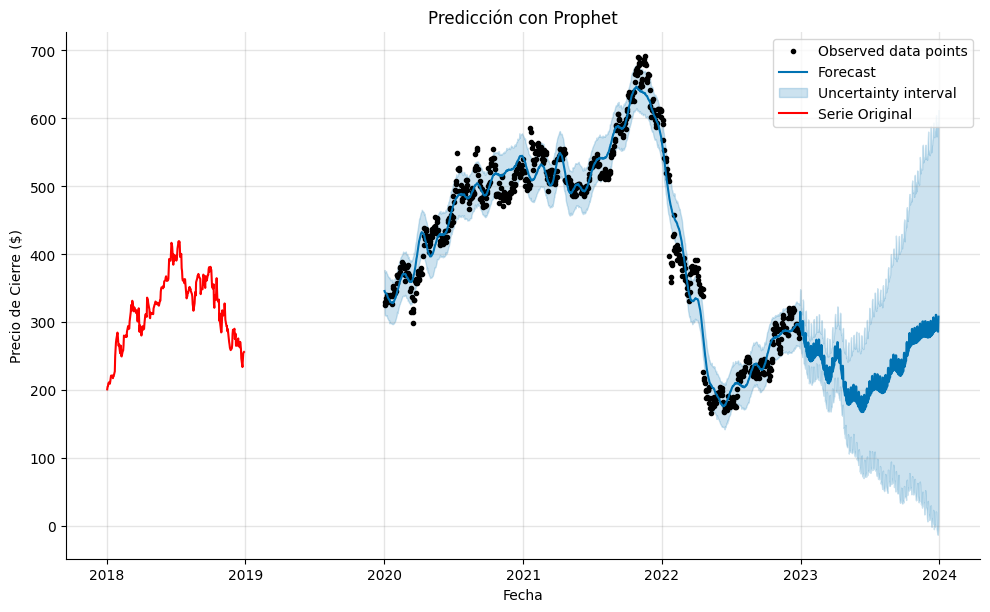

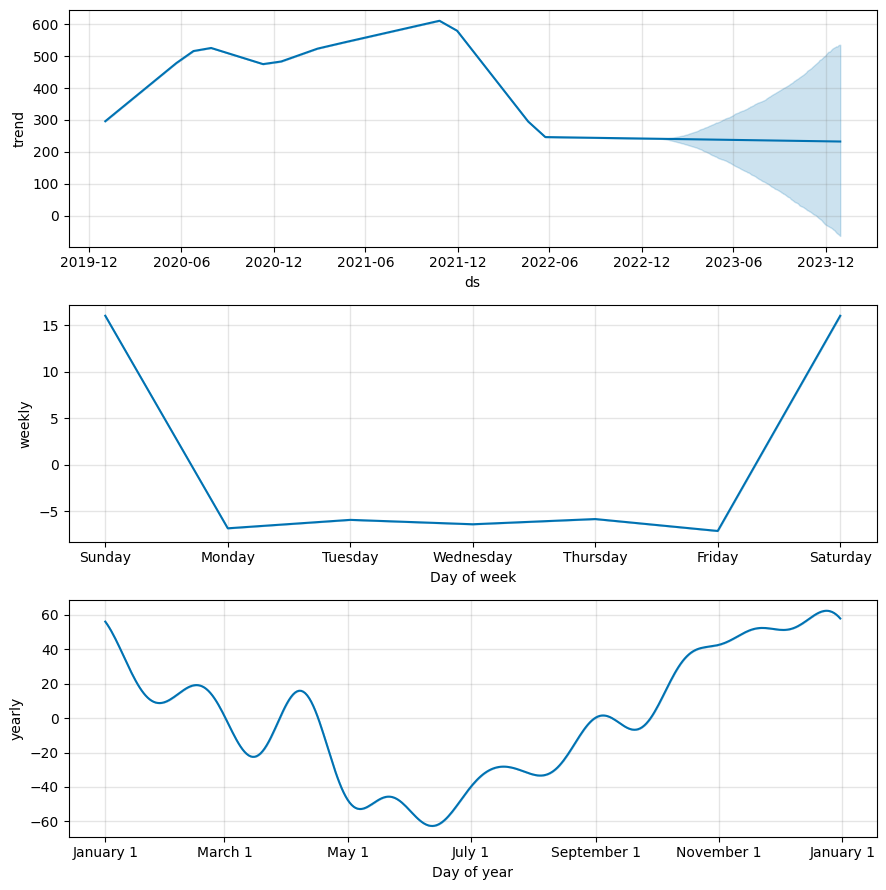

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['NFLX_Close'].reset_index().rename(columns={'Date': 'ds', 'NFLX_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['NFLX_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



El modelo Prophet utilizado ha logrado capturar las tendencias generales y los patrones estacionales del precio de cierre de Netflix, reflejando comportamientos a corto y largo plazo. Aunque la predicción es razonable para períodos cercanos, la incertidumbre aumenta considerablemente al extenderse en el tiempo, lo que sugiere precaución al interpretar los resultados a futuro.

Este análisis proporciona una visión útil sobre cómo los datos históricos pueden informar sobre tendencias futuras, pero también resalta las limitaciones en la predicción de eventos a largo plazo.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/jzj4g411.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/5acplieh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99065', 'data', 'file=/tmp/tmpmlc9mosk/jzj4g411.json', 'init=/tmp/tmpmlc9mosk/5acplieh.json', 'output', 'file=/tmp/tmpmlc9mosk/prophet_model909161eo/prophet_model-20241122195937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


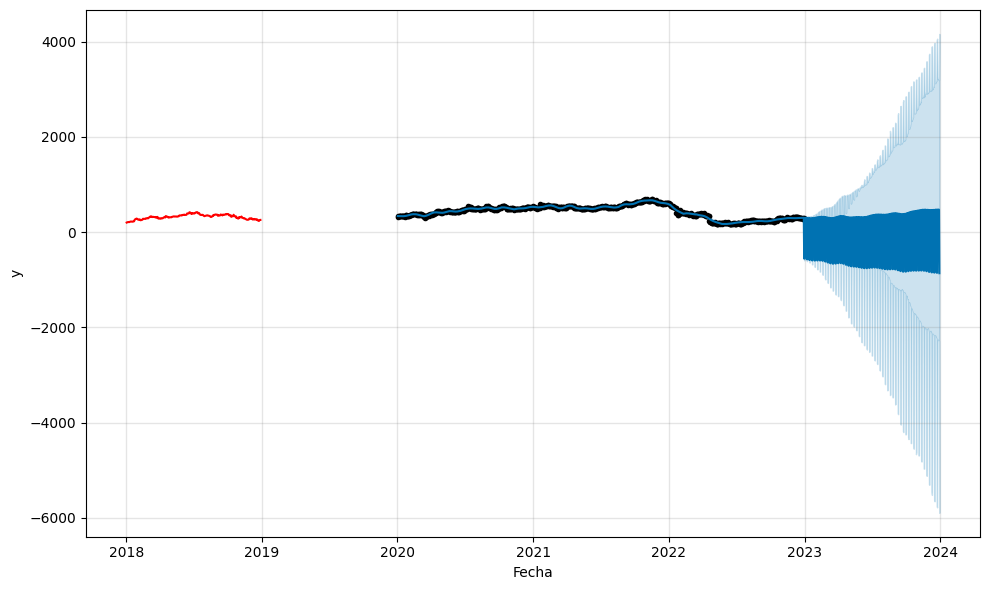

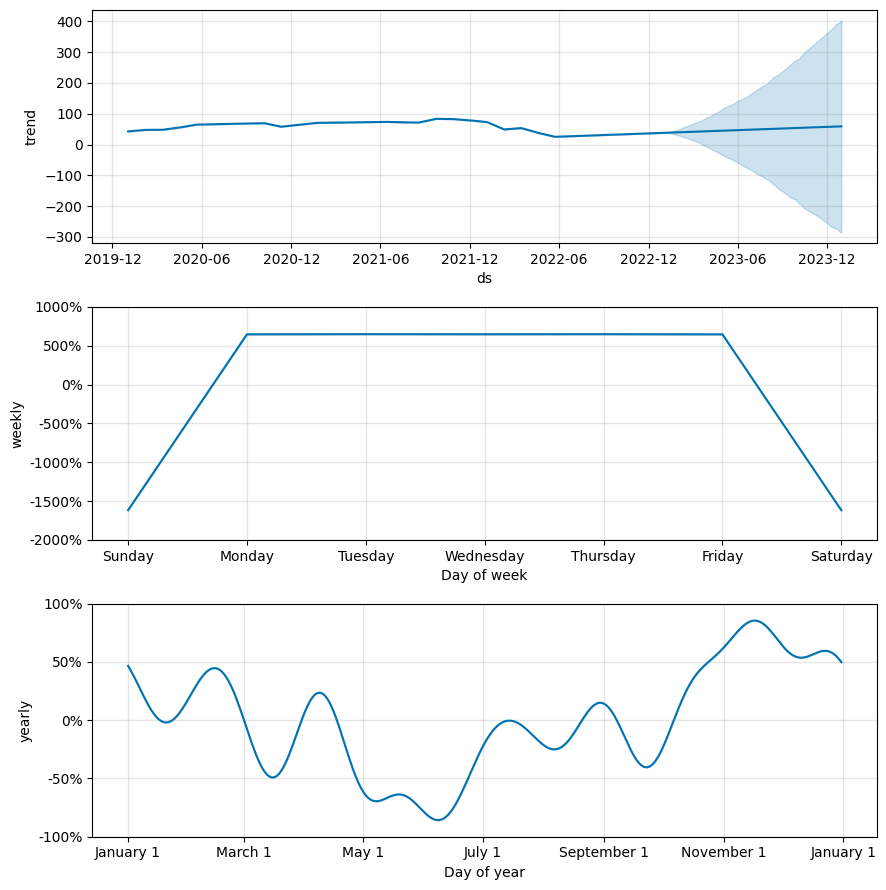

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['NFLX_Close'].reset_index().rename(columns={'Date': 'ds', 'NFLX_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['NFLX_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)

Los gráficos muestran cómo un modelo de predicción analiza el comportamiento de una serie temporal, identificando patrones históricos y proyectando tendencias futuras. En general, se observa un crecimiento sostenido durante los primeros años, seguido de un descenso progresivo en el tiempo reciente, con expectativas de que esta tendencia negativa continúe. Además, se destacan variaciones semanales y estacionales que reflejan patrones de comportamiento cíclicos.

Esto sugiere que el fenómeno estudiado tiene componentes tanto a corto como a largo plazo que afectan su evolución.

# Resultado

El modelo Prophet utilizado ha logrado capturar las tendencias generales y los patrones estacionales del precio de cierre de Netflix, reflejando comportamientos a corto y largo plazo. Los gráficos muestran cómo el modelo analiza el comportamiento de la serie temporal, identificando patrones históricos y proyectando tendencias futuras. En general, se observa un crecimiento sostenido durante los primeros años, seguido de un descenso progresivo en el tiempo reciente, con expectativas de que esta tendencia negativa continúe. Además, se destacan variaciones semanales y estacionales que reflejan patrones cíclicos en el comportamiento.

Aunque la predicción es razonable para períodos cercanos, la incertidumbre aumenta considerablemente al extenderse en el tiempo, lo que sugiere precaución al interpretar los resultados a futuro. Este análisis proporciona una visión útil sobre cómo los datos históricos pueden informar sobre tendencias futuras, pero también resalta las limitaciones en la predicción de eventos a largo plazo. Esto sugiere que el fenómeno estudiado tiene componentes tanto a corto como a largo plazo que afectan su evolución.

# Amazon

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/n45ac8fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/f5e1sr_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82280', 'data', 'file=/tmp/tmpmlc9mosk/n45ac8fa.json', 'init=/tmp/tmpmlc9mosk/f5e1sr_3.json', 'output', 'file=/tmp/tmpmlc9mosk/prophet_modelcslhsj_2/prophet_model-20241122195945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


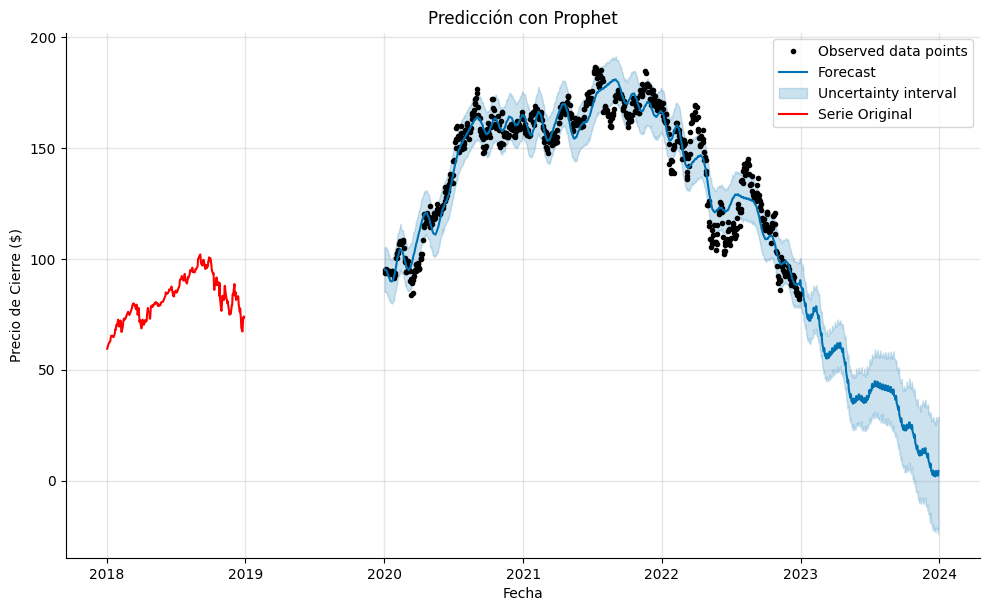

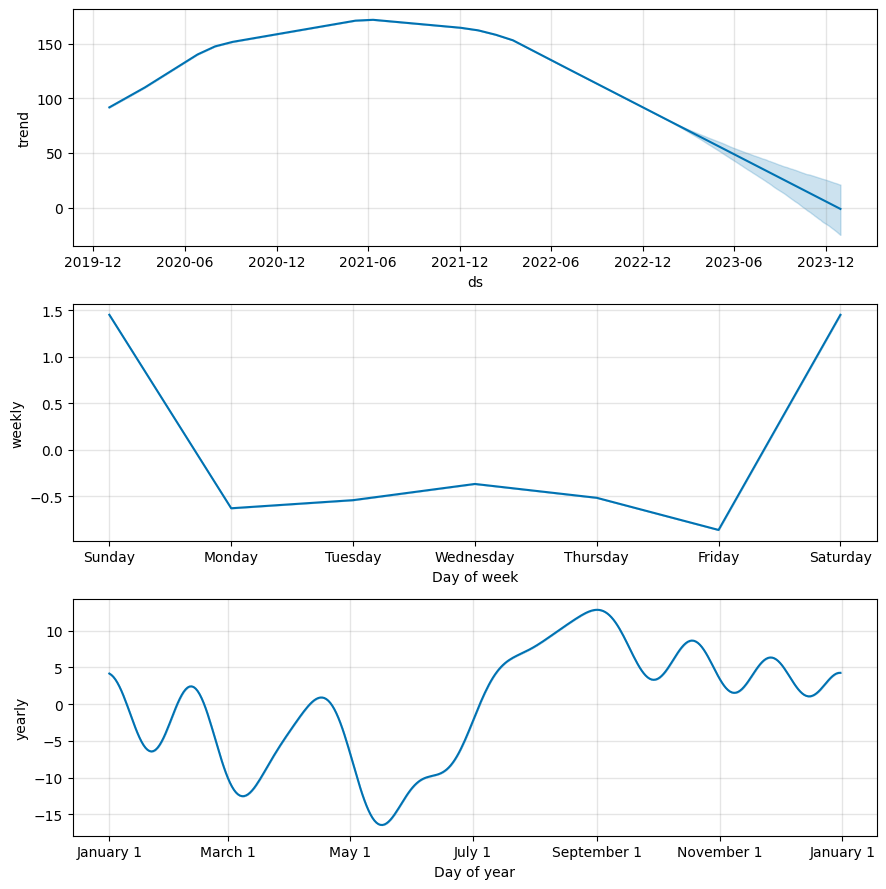

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['AMZN_Close'].reset_index().rename(columns={'Date': 'ds', 'AMZN_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AMZN_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

En general, los gráficos muestran que el modelo Prophet identifica una tendencia general de crecimiento en los precios hasta 2021, seguida de una caída constante desde entonces. Además, el modelo considera patrones estacionales y semanales que afectan los precios, destacando variaciones según el día de la semana y el mes del año. El pronóstico sugiere que los precios seguirán disminuyendo en el futuro, con cierto nivel de incertidumbre, pero respetando las fluctuaciones observadas en los datos históricos.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/ln20vttc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlc9mosk/c2j8u4hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7342', 'data', 'file=/tmp/tmpmlc9mosk/ln20vttc.json', 'init=/tmp/tmpmlc9mosk/c2j8u4hh.json', 'output', 'file=/tmp/tmpmlc9mosk/prophet_modelrspku616/prophet_model-20241122195948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


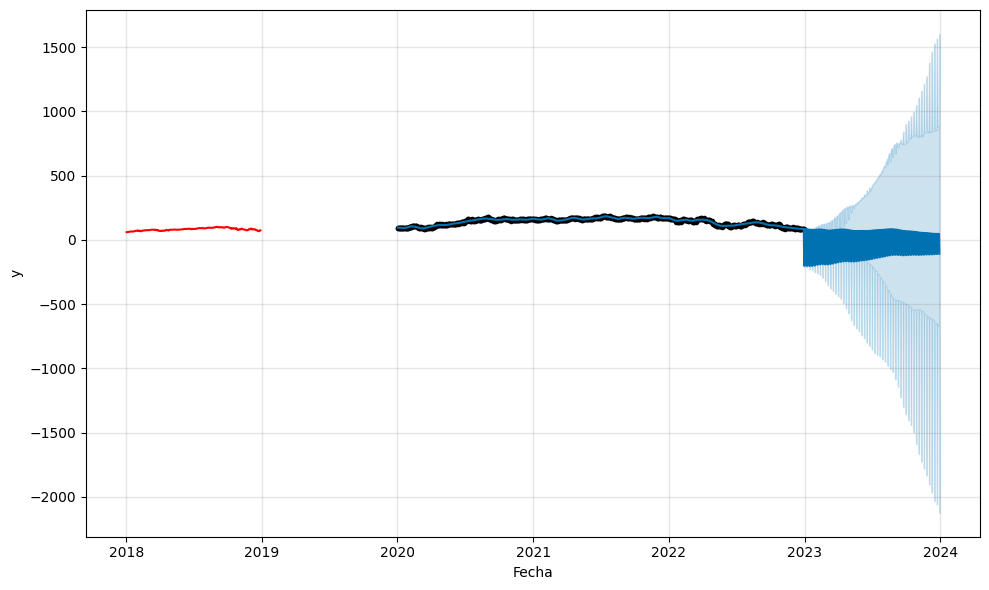

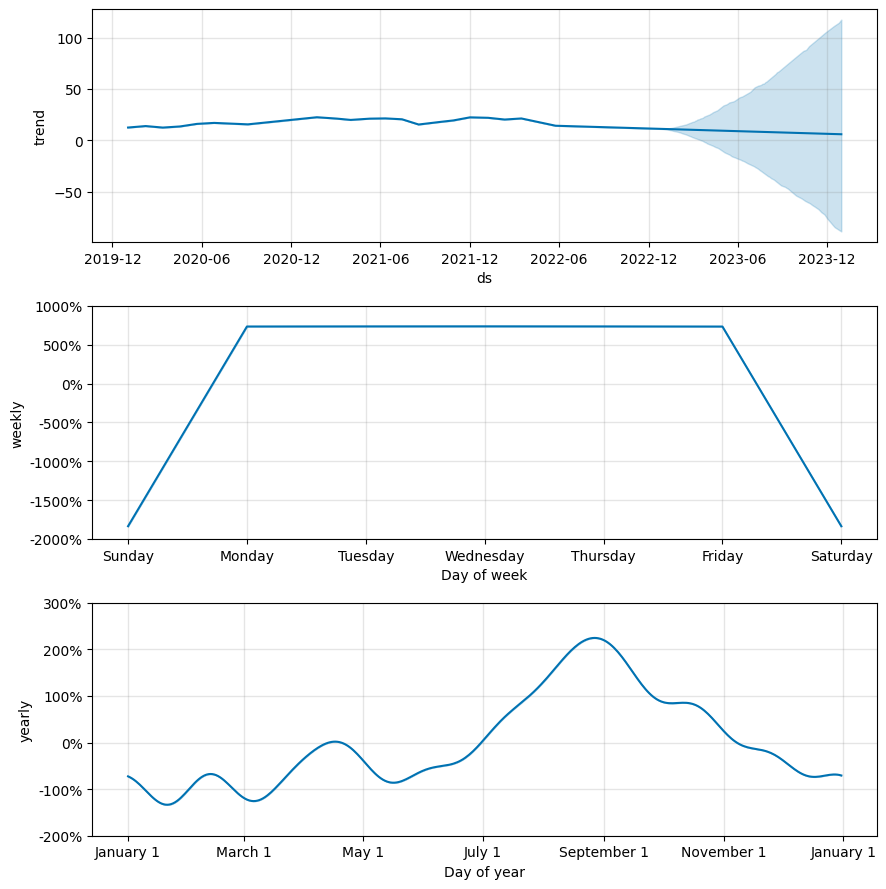

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['AMZN_Close'].reset_index().rename(columns={'Date': 'ds', 'AMZN_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AMZN_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)

En general, los gráficos muestran un análisis de tendencias y patrones temporales. Los datos históricos son estables, pero las predicciones futuras tienen una creciente incertidumbre. Además, se identifican patrones recurrentes en la semana (mayor actividad entre lunes y miércoles) y durante el año (picos en verano y caídas hacia el invierno). Esto sugiere que los datos están influenciados por factores temporales claros, tanto a corto como a largo plazo.

# Resultado

En general, los gráficos muestran que el modelo Prophet identifica una tendencia general en los datos, con estabilidad histórica hasta 2021, seguida de una caída constante desde entonces. Además, el modelo resalta patrones estacionales y semanales que influyen en los valores, como variaciones según el día de la semana (mayor actividad entre lunes y miércoles) y estacionalidades anuales (picos en verano y caídas en invierno). El pronóstico sugiere que los valores seguirán disminuyendo en el futuro, con un nivel creciente de incertidumbre, aunque respetando las fluctuaciones observadas en los datos históricos. Esto indica que los datos están influenciados por factores temporales consistentes a corto y largo plazo.

**CONCLUSION GENERAL**

Para finalizar, mediante el análisis de las series de tiempo de Netflix y Amazon, apoyados de las técnicas avanzadas como la prueba de Causalidad de Granger y el modelo Prophet para probar si una de estas series causa a la otra se obtuvieron los siguientes hallazgos.
Aunque se detectó una causalidad significativa de Netflix hacia la empresa Amazon para un rezago (lag 1), no persiste en rázagos mayores; lo que sugiere que cualquier influencia de corto plazo podría explicarse por los efectos externos que no fueron capturados en el análisis. Se concluye que la prueba de Causalidad de Granger no revela una relación causal solida entre las dos series de tiempo en los rezagos evaluados.

Por otra parte, el modelo Prophet tuvo efectividad al momento de identificar las tendencias y patrones estacionales presentes en ambas series. Para el caso de Netflix, se observó un periodo de crecimiento que se mantuvo hasta el año 2021, para después sufrir una caída y una leve recuperación en el año 2022. En el caso de la empresa Amazon, las tendencias reflejaron un comportamiento similar, presento un aumento inicial causado por el auge de las compras en línea durante la pandemia, donde después se presentó una desaceleración en el año 2022. No obstante, no se lograron capturar adecuadamente algunas irregulares o eventos excepcionales por el modelo. Esto resalta las limitaciones que presenta el modelo Prophet al momento de modelar patrones altamente no lineales o ruido estructural. Las fluctuaciones presentes en ambas series de tiempo parecen responder a factores externos del mercado que a una relación directa entre estas.

En general, mediante el uso de estas técnicas estadísticas y de predicción se demostró la importancia de abordar las series de tiempo desde diversas perspectivas para obtener una mejor comprensión de los factores subyacentes.
